In [592]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [593]:
df = pd.read_csv("G:/Coding/Datasets/airbnb.csv")

In [594]:
df.head()

,Listings id,Last year reviews,Host since,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,...,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Coordinates,Date of scraping
0,31840,6,2011-02-07,Host,44.0,Centro Storico,1.0,1.0,Private room,2,...,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,"43.77709, 11.25216",2024-12-15
1,222527,0,2011-07-11,Superhost,3.0,Rifredi,3.0,2.0,Entire home,4,...,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,"43.82005, 11.22004",2024-12-15
2,32120,6,2010-03-26,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,2,...,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,"43.76157, 11.27741",2024-12-15
3,224562,9,2011-09-16,Host,2.0,Centro Storico,1.0,1.0,Entire home,4,...,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,"43.772, 11.26142",2024-12-15
4,32180,11,2014-04-05,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,4,...,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,"43.76832, 11.24348",2024-12-15


In [595]:
#lets check if there are any null values in any column
df.isnull().sum()

Listings id                0
Last year reviews          0
Host since                 0
Host is superhost          0
Host number of listings    0
Neighbourhood              0
Beds number                0
Bedrooms number            0
Property type              0
Maximum allowed guests     0
Price                      0
Total reviews              0
Rating score               0
Accuracy score             0
Cleanliness score          0
Checkin score              0
Communication score        0
Location score             0
Value for money score      0
Reviews per month          0
City                       0
Season                     0
Bathrooms number           0
Bathrooms type             0
Coordinates                0
Date of scraping           0
dtype: int64

In [596]:
# checking if there are any duplicated data
df.duplicated().sum()

0

In [597]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282047 entries, 0 to 282046
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Listings id              282047 non-null  int64  
 1   Last year reviews        282047 non-null  int64  
 2   Host since               282047 non-null  object 
 3   Host is superhost        282047 non-null  object 
 4   Host number of listings  282047 non-null  float64
 5   Neighbourhood            282047 non-null  object 
 6   Beds number              282047 non-null  float64
 7   Bedrooms number          282047 non-null  float64
 8   Property type            282047 non-null  object 
 9   Maximum allowed guests   282047 non-null  int64  
 10  Price                    282047 non-null  float64
 11  Total reviews            282047 non-null  int64  
 12  Rating score             282047 non-null  float64
 13  Accuracy score           282047 non-null  float64
 14  Clea

In [598]:
# as we got to know the data types. now we can convert few data types and also drop some of the data as it wont be useful in predictions. 
# we can remove the listing id, date of scraping since both columns will not be useful in prediction. 

df.drop(['Listings id','Date of scraping','Host since','Host number of listings'], axis=1 , inplace = True)

In [599]:
df.head()

,Last year reviews,Host is superhost,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,Price,Total reviews,Rating score,...,Checkin score,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Coordinates
0,6,Host,Centro Storico,1.0,1.0,Private room,2,89.0,128,4.65,...,4.85,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,"43.77709, 11.25216"
1,0,Superhost,Rifredi,3.0,2.0,Entire home,4,300.0,284,4.85,...,4.99,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,"43.82005, 11.22004"
2,6,Host,Gavinana Galluzzo,1.0,1.0,Entire home,2,95.0,26,4.88,...,4.84,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,"43.76157, 11.27741"
3,9,Host,Centro Storico,1.0,1.0,Entire home,4,60.0,101,4.66,...,4.76,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,"43.772, 11.26142"
4,11,Superhost,Centro Storico,4.0,2.0,Entire home,4,105.0,34,4.76,...,4.81,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,"43.76832, 11.24348"


Text(0.5, 1.0, 'Price Distribution')

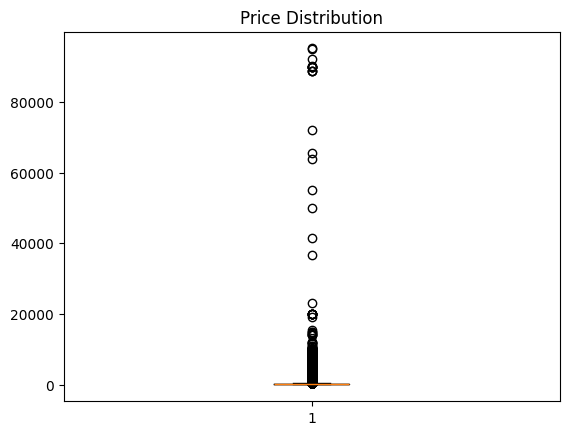

In [600]:
# lets take care of the outliers in price section 
plt.boxplot(df['Price'])
plt.title('Price Distribution')

In [601]:
#taking care of outliers and removing them
upper_limit = np.percentile(df['Price'],99)
lower_limit = np.percentile(df['Price'],1)

In [602]:
#removing outliers which are above 99 percentile and below 1 percentile
df = df[(df['Price']<upper_limit) & (df['Price']>lower_limit)]

Text(0.5, 1.0, 'Price Distribution')

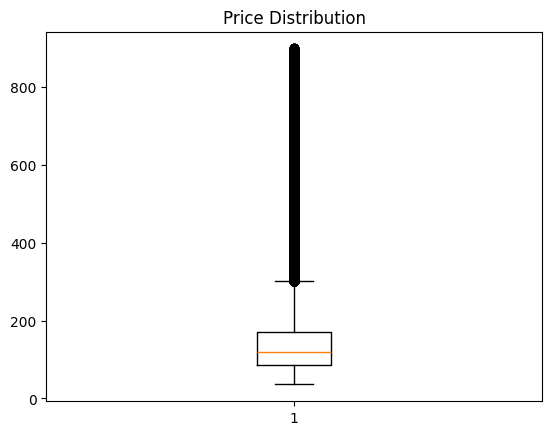

In [603]:
#making a boxplot again to check if the outliers are removed
plt.boxplot(df['Price'])
plt.title('Price Distribution')

In [604]:
df.select_dtypes(include='object')

,Host is superhost,Neighbourhood,Property type,City,Season,Bathrooms type,Coordinates
0,Host,Centro Storico,Private room,Firenze,Early Winter,private,"43.77709, 11.25216"
1,Superhost,Rifredi,Entire home,Firenze,Early Winter,private,"43.82005, 11.22004"
2,Host,Gavinana Galluzzo,Entire home,Firenze,Early Winter,private,"43.76157, 11.27741"
3,Host,Centro Storico,Entire home,Firenze,Early Winter,private,"43.772, 11.26142"
4,Superhost,Centro Storico,Entire home,Firenze,Early Winter,private,"43.76832, 11.24348"
...,...,...,...,...,...,...,...
282042,Host,Santa Croce,Entire home,Venezia,Early Autumn,private,"45.44175, 12.32484"
282043,Host,Dorsoduro,Entire home,Venezia,Early Autumn,private,"45.43524874231471, 12.3209960013628"
282044,Host,Piave 1860,Entire home,Venezia,Early Autumn,private,"45.4859248, 12.2292505"
282045,Host,San Lorenzo XXV Aprile,Entire home,Venezia,Early Autumn,private,"45.49259973446829, 12.244685252349434"


In [605]:
#by using label encoding we can convert the object data types to numerical data types
le = LabelEncoder()
df['Season_encoded'] = le.fit_transform (df['Season'])

In [606]:
# Convert categorical columns to binary (0 and 1) basically one hot encoding
df = pd.get_dummies(df, columns=['Host is superhost', 'Property type', 'City', 'Bathrooms type'])

In [607]:
# Convert boolean columns to integer format
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [608]:
df.drop(['Season'],axis = 1, inplace = True)

In [609]:
# Split the 'Coordinates' column into 'Latitude' and 'Longitude'
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True).astype(float)

# Drop the original 'Coordinates' column if it's no longer needed
df = df.drop(columns=['Coordinates'])

In [610]:
# Apply Target Encoding for the "Neighbourhood" column
# Replace each neighbourhood with the mean price for listings in that neighbourhood
df['Neighbourhood_encoded'] = df.groupby('Neighbourhood')['Price'].transform('mean')

# Drop the original "Neighbourhood" column to avoid duplication
df = df.drop(columns=['Neighbourhood'])



In [611]:
numerical_cols = ['Total reviews','Beds number','Bedrooms number','Bathrooms number','Maximum allowed guests']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [612]:
df.head()

,Last year reviews,Beds number,Bedrooms number,Maximum allowed guests,Price,Total reviews,Rating score,Accuracy score,Cleanliness score,Checkin score,...,City_Firenze,City_Milano,City_Napoli,City_Roma,City_Venezia,Bathrooms type_private,Bathrooms type_shared,Latitude,Longitude,Neighbourhood_encoded
0,6,-0.813131,-0.525025,-0.904855,89.0,0.683737,4.65,4.73,4.86,4.85,...,1,0,0,0,0,1,0,43.77709,11.25216,182.357114
1,0,0.745183,0.871262,0.223529,300.0,2.284114,4.85,4.88,4.88,4.99,...,1,0,0,0,0,1,0,43.82005,11.22004,113.426344
2,6,-0.813131,-0.525025,-0.904855,95.0,-0.362664,4.88,4.88,4.88,4.84,...,1,0,0,0,0,1,0,43.76157,11.27741,134.534997
3,9,-0.813131,-0.525025,0.223529,60.0,0.406749,4.66,4.75,4.71,4.76,...,1,0,0,0,0,1,0,43.77200,11.26142,182.357114
4,11,1.524339,0.871262,0.223529,105.0,-0.280593,4.76,4.81,4.84,4.81,...,1,0,0,0,0,1,0,43.76832,11.24348,182.357114


<Axes: >

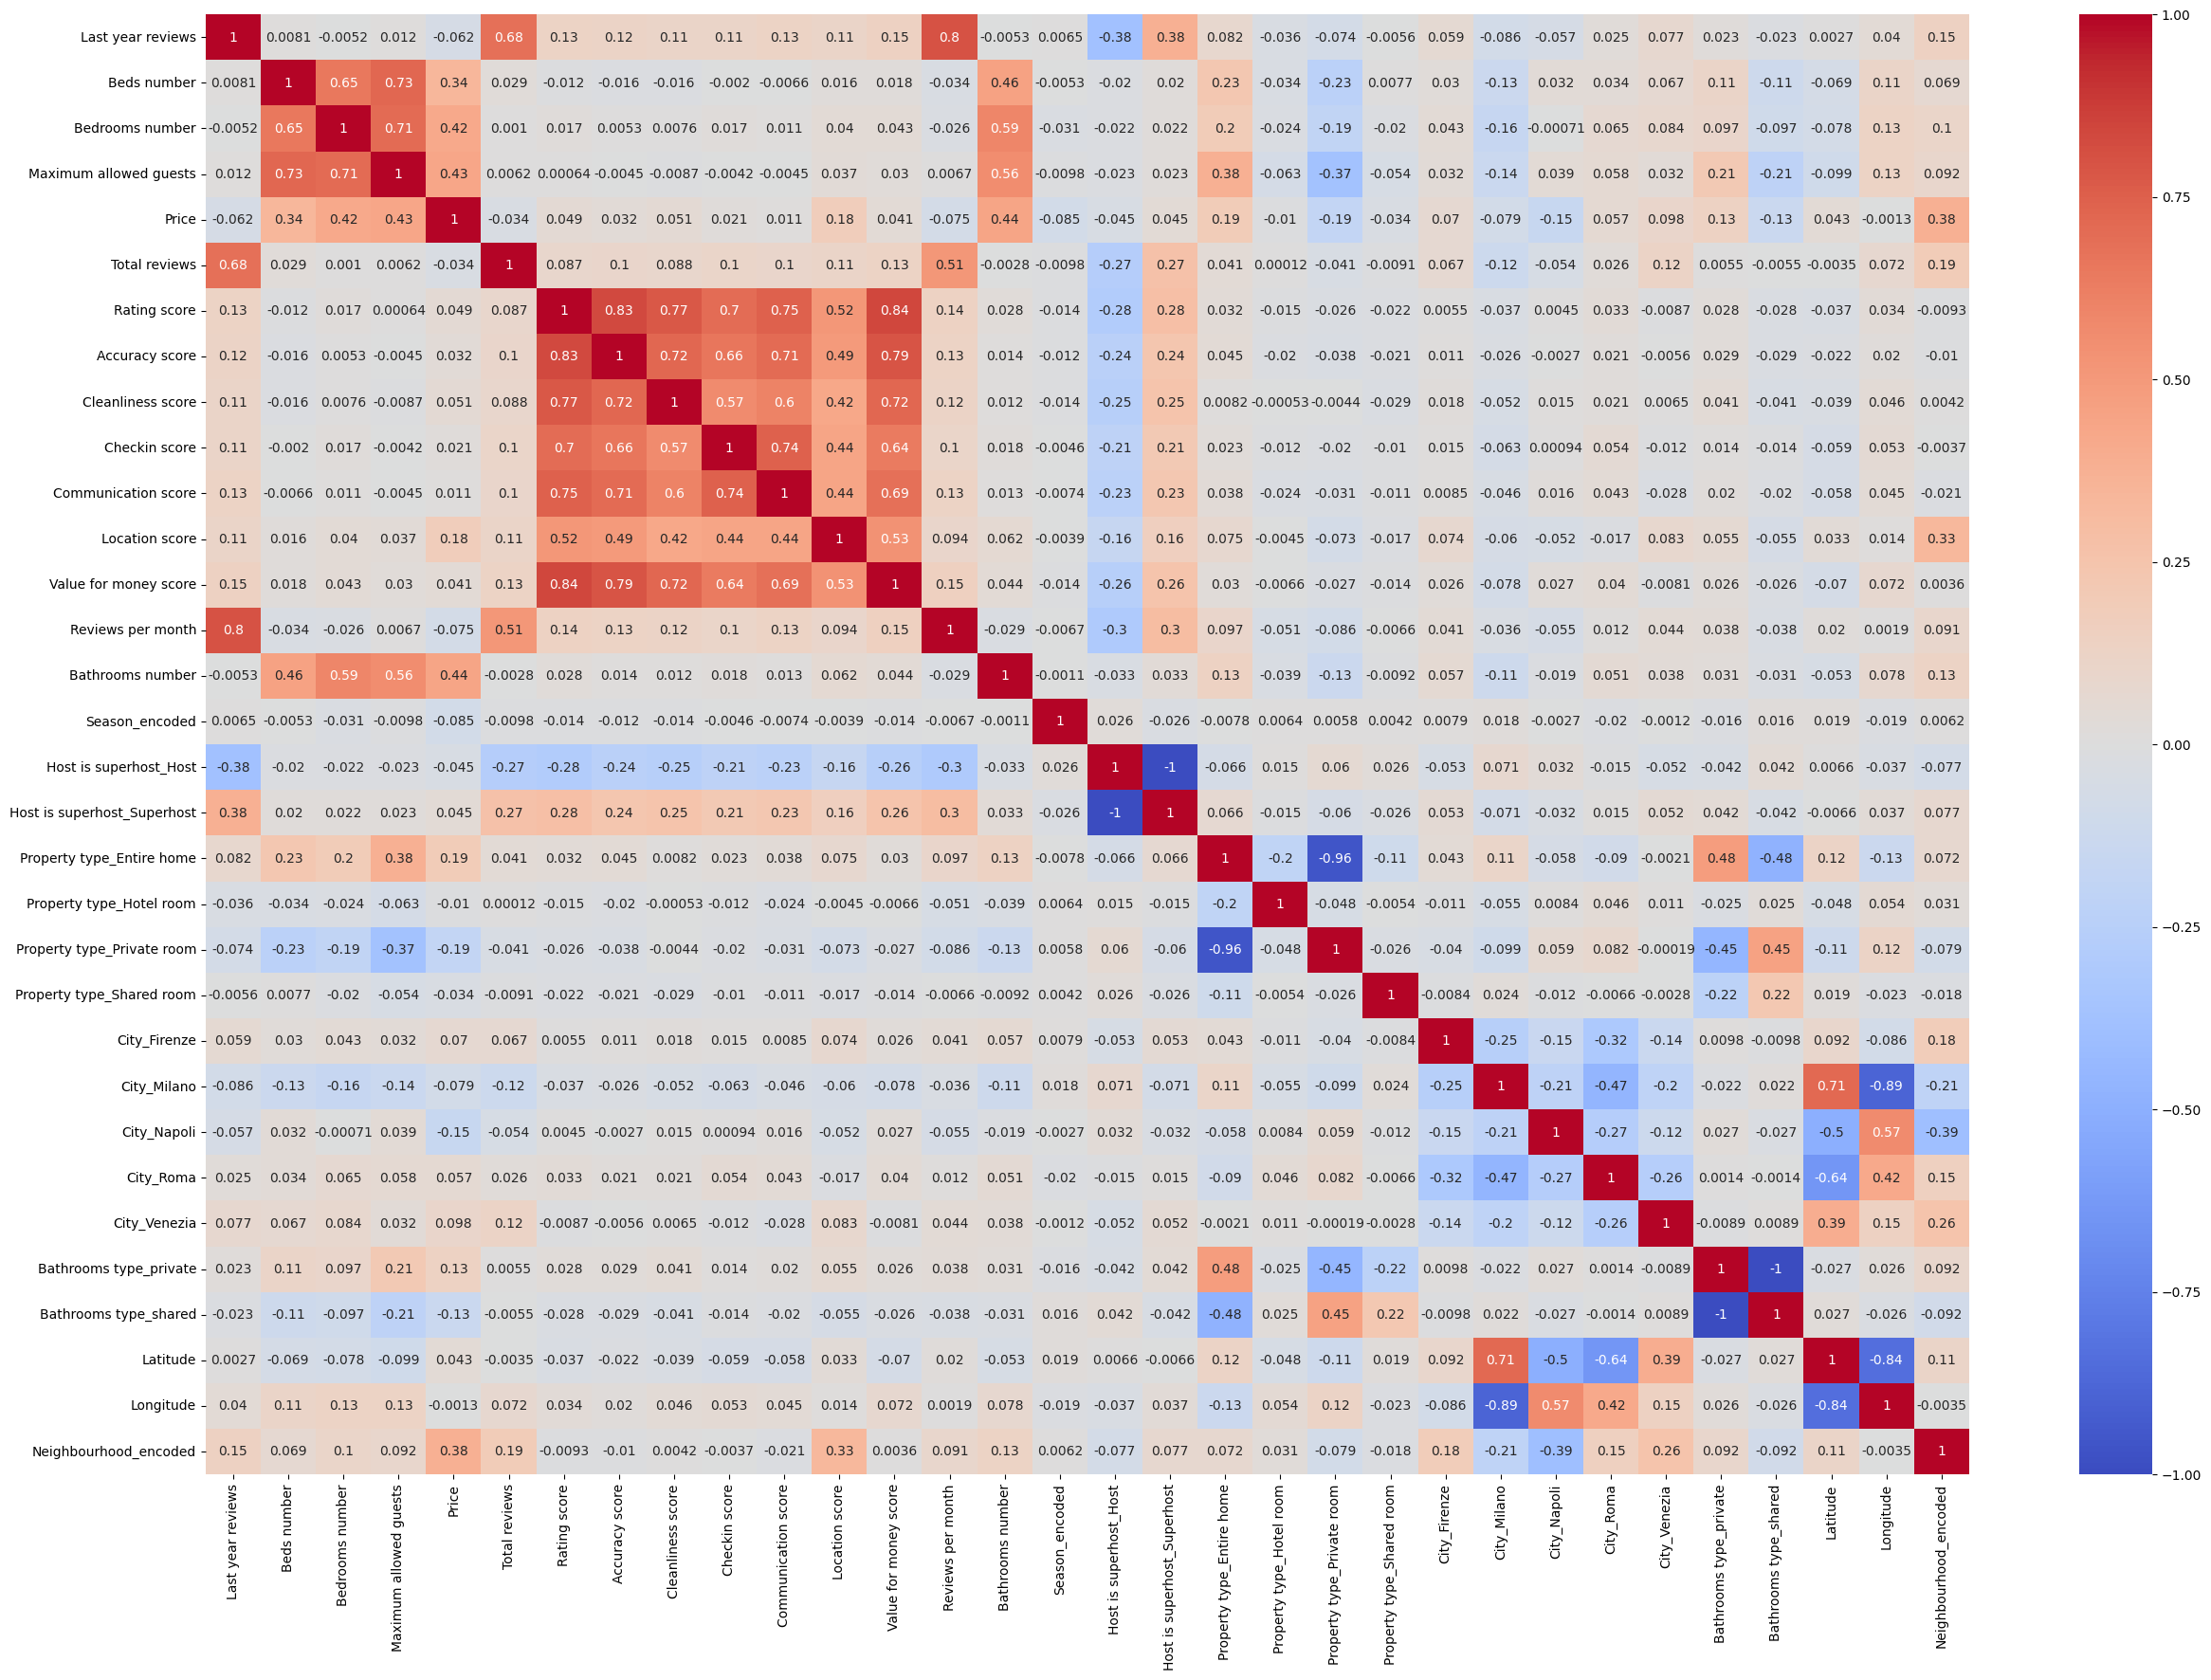

In [613]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [614]:
X = df.drop(columns=["Price"])
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [615]:
lr = LinearRegression()

In [616]:
lr

LinearRegression()

In [617]:
lr.fit(X_train, y_train)

LinearRegression()

In [618]:
y_pred = lr.predict(X_test)

In [619]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [620]:
print("Mean Squared Error: ", mse)
print("Mean absolute error: ", mae)
print("R2 score: ", r2)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  6711.080694403355
Mean absolute error:  51.04866403865449
R2 score:  0.38930851715812387
Root Mean Squared Error:  81.92118587034342
